In [1]:
print("hello sneh ")

hello sneh 


In [2]:
#image caption project 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import json
#import keras.applications.resnet

In [3]:
def pathreader(path):
    with open(path) as f:
        captions=f.read()
    return captions

In [4]:
path=r"C:\Users\Dell\Desktop\data science certificate\sneh\token.txt"

In [5]:
img_path=r"C:\Users\Dell\Desktop\data science certificate\sneh\Images"

In [6]:
captions=pathreader(path)

In [7]:
captions=captions.split('\n')[:-1]

In [8]:
captions[1]

'1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .'

In [9]:
description={}

In [10]:
c=0
for x in captions:
    first,second=x.split('\t')
    img_name=first.split(".")[0]
    if description.get(img_name) is None:
        description[img_name]=[]
    description[img_name].append(second)

In [11]:
description["1000268201_693b08cb0e"]

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

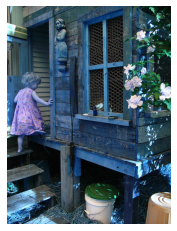

In [12]:
import cv2
img=cv2.imread(img_path+"/1000268201_693b08cb0e.jpg")
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )
plt.imshow(img)
plt.axis("off")
plt.show()


In [13]:
def clean_text(sent):
    sent=sent.lower()
    sent=re.sub("[^a-z]+"," ",sent)
    sent=sent.split()
    sent=[s for s in sent if len(s)>1]
    sent=" ".join(sent)
    return sent
    

In [14]:
a=" a cat  is catting in room number 23"
c=clean_text(a)

In [15]:
print(c)

cat is catting in room number


In [16]:
for key,cap_list in description.items():
    for i in range(len(cap_list)):
        cap_list[i]=clean_text(cap_list[i])

In [17]:
with open("description_1.txt","w") as f:
    f.write(str(description))

In [18]:
#vocab 

In [62]:
"""""description=None
with open("description_1.txt",'r') as f:
    description=f.read()
json_accept_string=description.replace("'","\"")
description=json.loads(json_accept_string)
print(len(vocab)) """                                      
    

'""description=None\nwith open("description_1.txt",\'r\') as f:\n    description=f.read()\njson_accept_string=description.replace("\'",""")\ndescription=json.loads(json_accept_string)\nprint(len(vocab)) '

In [19]:
vocab=set()
for key in description.keys():
    [vocab.update(sent.split()) for sent in description[key]]

In [20]:
total_word=[]
for key in description.keys():
    [total_word.append(i) for des in description[key] for i in des.split()]

In [21]:
print(len(total_word))

373837


In [22]:
total_word[:10]

['child', 'in', 'pink', 'dress', 'is', 'climbing', 'up', 'set', 'of', 'stairs']

In [23]:
import collections
counter=collections.Counter(total_word)
freq_cnt=dict(counter)
print(len(freq_cnt.keys()))

8424


In [24]:
sorted_freq_cnt=sorted(freq_cnt.items(),reverse=True,key=lambda x:x[1])
threshold=10
sorted_freq_cnt=[x for x in sorted_freq_cnt if x[1]>threshold]
total_word=[x[0] for x in sorted_freq_cnt]

In [25]:
print(len(total_word))

1845


In [26]:
#training

In [27]:
#train_file_data=readTestFile("/Flickr_8k.trainImages.txt")
#text_file_data=open("Flickr_8k.trainImages.txt")

In [28]:
#print(train_file_data)

In [29]:
with open('Flickr_8k.trainImages.txt', 'r') as f:
    train_file_data = [line.strip() for line in f]

In [30]:
with open('Flickr_8k.testImages.txt', 'r') as f:
    test_file_data = [line.strip() for line in f]

In [31]:
train=[row.split(".")[0] for row in train_file_data]

In [32]:
print(train[:10])

['2513260012_03d33305cf', '2903617548_d3e38d7f88', '3338291921_fe7ae0c8f8', '488416045_1c6d903fe0', '2644326817_8f45080b87', '218342358_1755a9cce1', '2501968935_02f2cd8079', '2699342860_5288e203ea', '2638369467_8fc251595b', '2926786902_815a99a154']


In [33]:
test=[row.split(".")[0] for row in test_file_data]

In [34]:
print(test[:10])

['3385593926_d3e9c21170', '2677656448_6b7e7702af', '311146855_0b65fdb169', '1258913059_07c613f7ff', '241347760_d44c8d3a01', '2654514044_a70a6e2c21', '2339106348_2df90aa6a9', '256085101_2c2617c5d0', '280706862_14c30d734a', '3072172967_630e9c69d0']


In [35]:
train_description={}
for img_id in train:
    train_description[img_id]=[]
    for cap in description[img_id]:
        cap_to_append="startseq"+cap+"endseq"
        train_description[img_id].append(cap_to_append)

In [36]:
train_description["1000268201_693b08cb0e"]

['startseqchild in pink dress is climbing up set of stairs in an entry wayendseq',
 'startseqgirl going into wooden buildingendseq',
 'startseqlittle girl climbing into wooden playhouseendseq',
 'startseqlittle girl climbing the stairs to her playhouseendseq',
 'startseqlittle girl in pink dress going into wooden cabinendseq']

In [37]:
#model=ResNet50(weights="imagenet",input_shape=(224,224,3))
#model.summary()

In [38]:
word_to_idx={}
idx_to_word={}

In [39]:
for i,word in enumerate(total_word):
    word_to_idx[word]=i
    idx_to_word[i]=word

In [40]:
print(word_to_idx["stand"])
print(idx_to_word[111])

111
stand


In [41]:
idx_to_word[1846]="startseq"
word_to_idx["startseq"]=1846

In [42]:
idx_to_word[1847]="endseq"
word_to_idx["endseq"]=1847

In [43]:
vocab_size=len(word_to_idx)+1

In [44]:
print(vocab_size)

1848


In [45]:
max_len=0
for key in train_description.keys():
    for cap in train_description[key]:
        max_len=max(max_len,len(cap.split()))
print(max_len)

33


In [46]:
f=open("glove.6B.50d.txt",encoding='utf8')

In [47]:
embedding_index={}

In [48]:
for line in f:
    values=line.split()
    #print(values)
    word=values[0]
    embedding_word=np.array(values[1:],dtype='float')
    embedding_index[word]=embedding_word

In [49]:
f.close()

In [60]:
embedding_index['sneh']

array([-9.9080e-01, -4.3448e-01, -1.6129e-01,  3.2985e-01, -4.8436e-02,
        1.1470e+00, -6.0541e-01, -2.6760e-04, -1.8534e-01, -1.8770e+00,
        3.7385e-01,  4.2956e-01,  5.3638e-01,  1.1292e+00, -6.0505e-01,
        7.6967e-01,  8.4143e-01,  1.0987e-01,  6.1197e-02,  8.6556e-01,
       -1.7809e-01,  2.9375e-01,  2.8715e-02, -5.3287e-01,  1.0400e+00,
       -4.8664e-01,  6.8216e-01,  4.6089e-01,  6.9285e-01,  6.8988e-01,
       -6.6418e-01,  5.3460e-01, -3.7921e-01,  1.2845e-01, -6.1757e-01,
        7.0047e-01,  7.7609e-01, -3.7368e-01,  3.9435e-01,  1.8663e+00,
       -1.0906e-01,  7.3416e-01, -5.0910e-01, -1.3193e-01,  7.2898e-01,
       -3.0779e-01, -1.3152e+00,  2.0280e+00,  9.3225e-01,  1.0866e+00])

In [55]:
def get_embedding_matrix():
    emb_dim=50
    matrix=np.zeros((vocab_size,emb_dim))
    for word, idx in word_to_idx.items():
        embedding_vector=embedding_index.get(word)
        if embedding_vector is not None:
            matrix[idx]=embedding_vector
    return matrix
    

In [56]:
embedding_matrix=get_embedding_matrix()

In [57]:
embedding_matrix.shape

(1848, 50)

In [64]:
embedding_matrix[11]

array([-0.96256 ,  0.65329 , -0.55152 , -0.41065 ,  0.80223 ,  0.9833  ,
       -0.96007 , -1.029   , -0.47013 , -0.6812  ,  0.071232, -0.25591 ,
        0.60577 ,  0.29845 , -0.1837  , -0.26064 , -0.038707,  0.11412 ,
       -0.72028 , -1.2694  , -0.73858 ,  0.3357  ,  0.44293 ,  0.02566 ,
       -0.97692 , -1.6867  , -0.88665 ,  0.75824 ,  0.18836 , -0.6932  ,
        2.6144  ,  0.11718 , -0.45564 , -0.42953 , -0.052095,  0.11656 ,
       -0.66685 , -0.86056 , -0.093886, -0.74592 , -0.062858,  0.54547 ,
        0.28987 , -0.26887 ,  0.71881 , -0.074307, -0.18512 , -1.2621  ,
       -0.3246  , -0.56563 ])

In [63]:
print("hello")

hello
